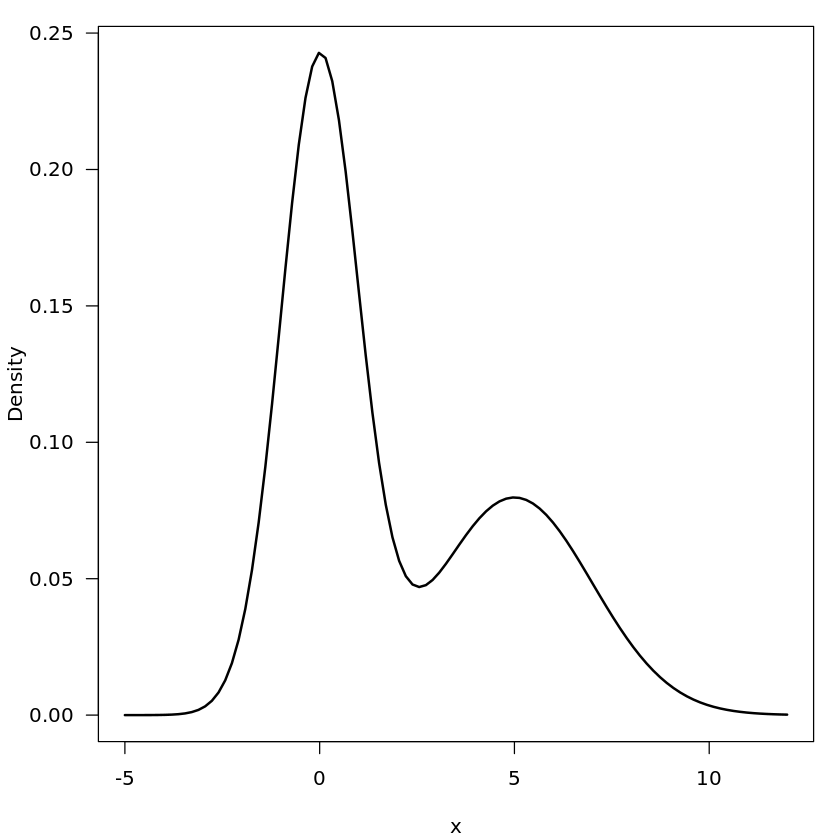

In [1]:
# Mixture of univariate Gaussians, bimodal
x = seq(-5, 12, length=100)
y = 0.6*dnorm(x, 0, 1) + 0.4*dnorm(x, 5, 2)
par(mar=c(4,4,1,1)+0.1)
plot(x, y, type="l", ylab="Density", las=1, lwd=2)


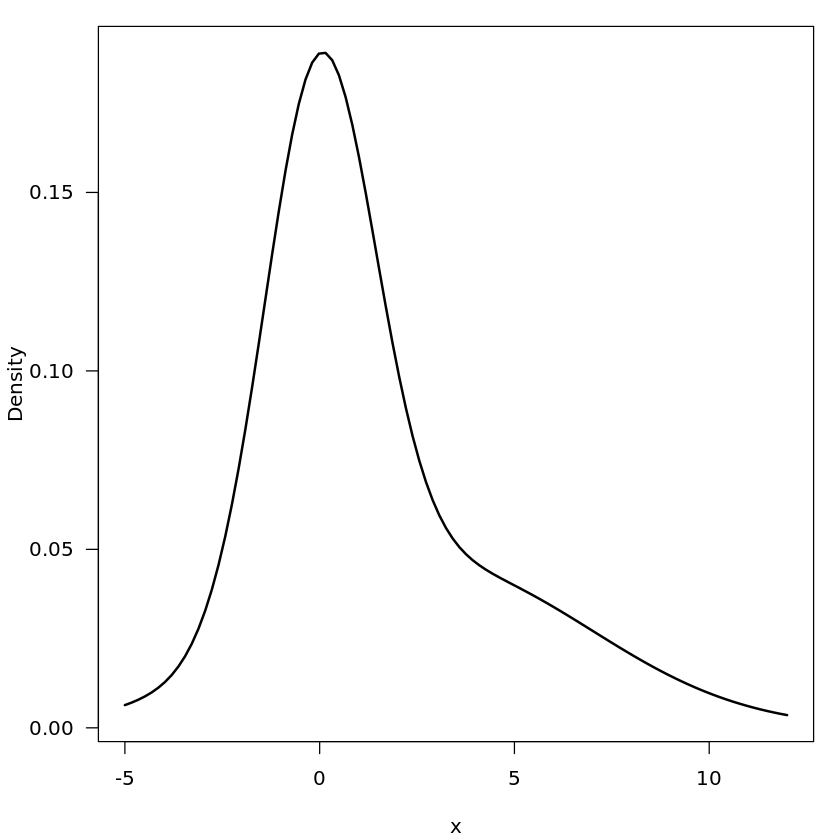

In [2]:
# Mixture of univariate Gaussians, unimodal skewed
x = seq(-5, 12, length=100)
y = 0.55*dnorm(x, 0, sqrt(2)) + 0.45*dnorm(x, 3, 4)
par(mar=c(4,4,1,1)+0.1)
plot(x, y, type="l", ylab="Density", las=1, lwd=2)


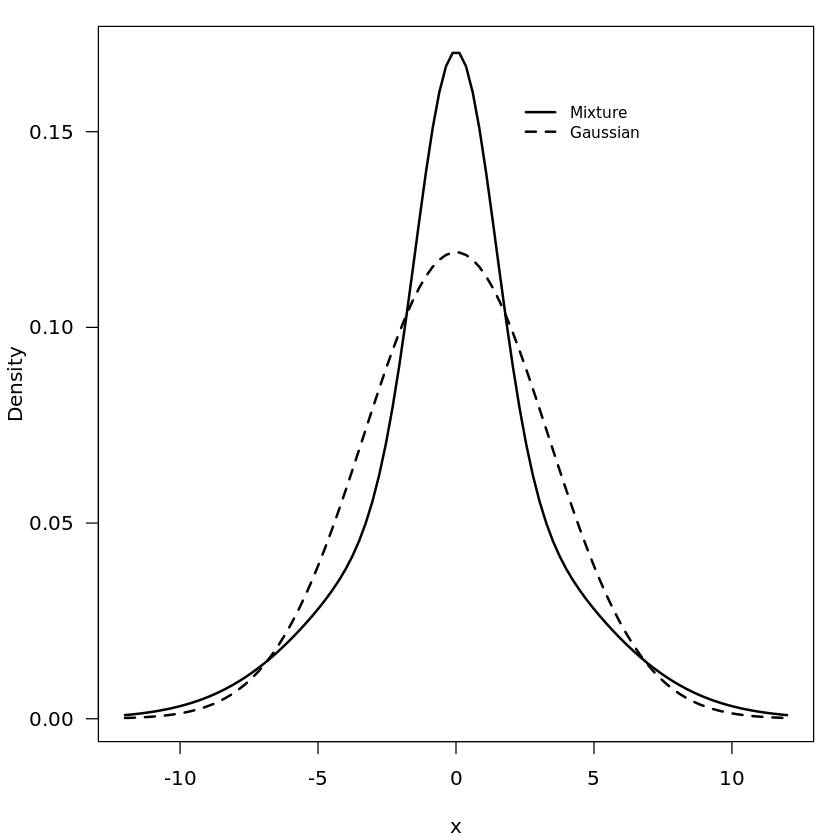

In [3]:
# Mixture of univariate Gaussians, unimodal heavy tail
x = seq(-12, 12, length=100)
y = 0.40*dnorm(x, 0, sqrt(2)) + 
    0.40*dnorm(x, 0, sqrt(16)) + 
    0.20*dnorm(x, 0, sqrt(20))
z = dnorm(x, 0, sqrt(0.4*2+0.4*16+0.2*20))
par(mar=c(4,4,1,1)+0.1)
plot(x, y, type="l", ylab="Density", las=1, lwd=2)
lines(x, z, lty=2, lwd=2)
legend(2, 0.16, c("Mixture","Gaussian"), lty=c(1,2), bty="n", 
       cex=0.77, lwd=c(2,2))


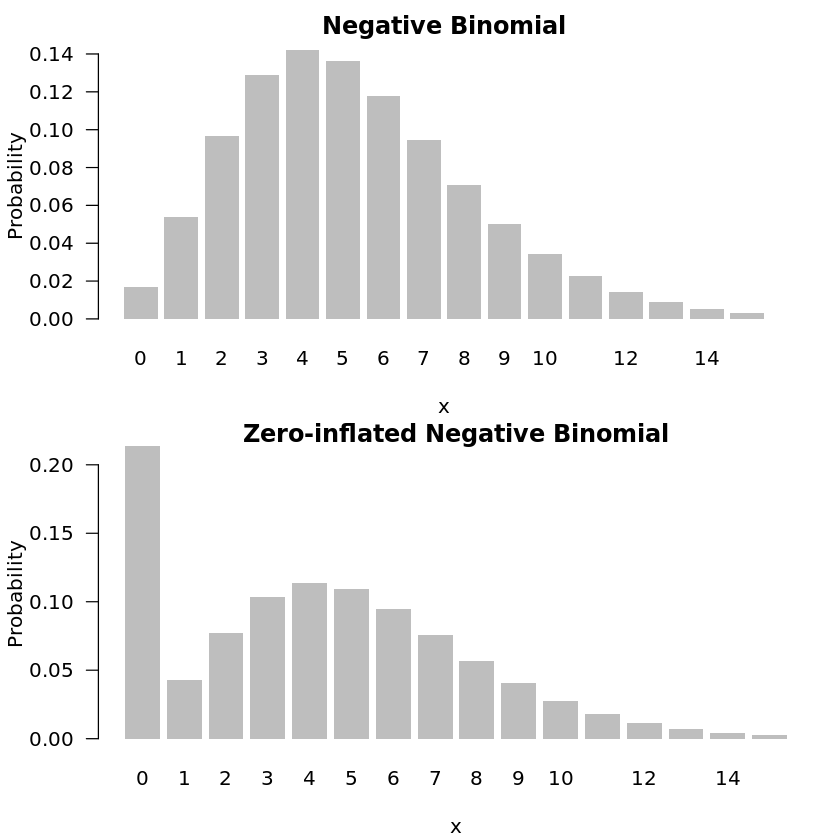

In [8]:
# Zero inflated negative binomial distribution
x = seq(0, 15)
y = dnbinom(x, 8, 0.6)
z = 0.2*c(1,rep(0,length(x)-1)) + (1-0.2)*y
par(mfrow=c(2,1))
par(mar=c(4,4,2,2)+0.1)
barplot(y, names.arg=x, las=1, xlab = "x", ylab="Probability", 
        border=NA, main="Negative Binomial")
par(mar=c(4,4,1,1)+0.1)
barplot(z, names.arg=x, las=1, xlab = "x", ylab="Probability", 
        border=NA, main="Zero-inflated Negative Binomial")



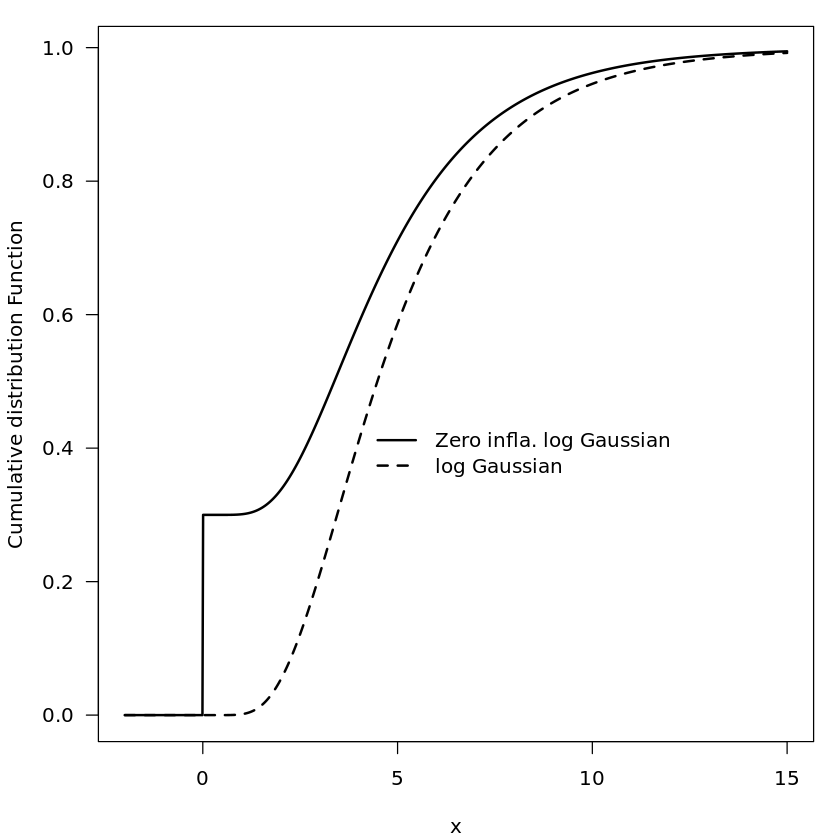

In [5]:
#Zero-inflated log Gaussian distribution
x = seq(-2, 15, length=1000)
y = plnorm(x, 1.5, 0.5)
z = 0.3*as.numeric(x>=0) + (1-0.3)*y
par(mar=c(4,4,1,1)+0.1)
plot(x, y, type="l", las=1, lty=2, xlab="x", 
     ylab="Cumulative distribution Function", lwd=2)
lines(x, z, lty=1, lwd=2)
legend(4, 0.45, c("Zero infla. log Gaussian","log Gaussian"), 
     lty=c(1,2), bty="n", lwd=c(2,2))


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message in geom_line(aes(y = y), color = "blue", linetype = "solid", size = 1.5, :
“Ignoring unknown parameters: `label`”
Warning message in geom_line(aes(y = z), color = "red", linetype = "dashed", size = 1.5, :
“Ignoring unknown parameters: `label`”


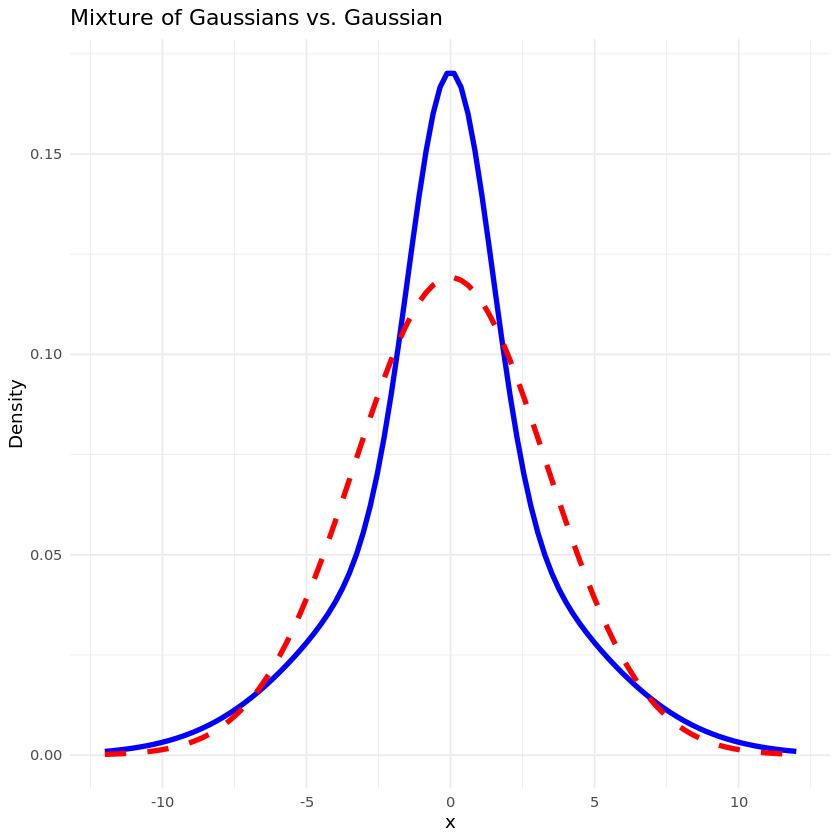

In [11]:
library(ggplot2)

# Define the function to plot the zero-inflated mixture distribution
plot_zero_inflated_mixture <- function() {
  # Create a sequence of values for the x-axis
  x <- seq(-12, 12, length = 100)

  # Define the parameters of the zero-inflated mixture
  weight_gaussian1 <- 0.40
  weight_gaussian2 <- 0.40
  weight_gaussian3 <- 0.20
  sd_gaussian1 <- sqrt(2)
  sd_gaussian2 <- sqrt(16)
  sd_gaussian3 <- sqrt(20)

  # Calculate the densities of the mixture components and the overall density
  y <- weight_gaussian1 * dnorm(x, 0, sd_gaussian1) +
       weight_gaussian2 * dnorm(x, 0, sd_gaussian2) +
       weight_gaussian3 * dnorm(x, 0, sd_gaussian3)
  z <- dnorm(x, 0, sqrt(weight_gaussian1 * sd_gaussian1^2 +
                        weight_gaussian2 * sd_gaussian2^2 +
                        weight_gaussian3 * sd_gaussian3^2))

  # Create a data frame for plotting
  data <- data.frame(x = x, y = y, z = z)

  # Create the plot using ggplot2
  plot <- ggplot(data, aes(x = x)) +
          geom_line(aes(y = y), color = "blue", linetype = "solid", size = 1.5, label = "Mixture") +
          geom_line(aes(y = z), color = "red", linetype = "dashed", size = 1.5, label = "Gaussian") +
          labs(x = "x", y = "Density") +
          ggtitle("Mixture of Gaussians vs. Gaussian") +
          theme_minimal() +
          theme(legend.position = "top")

  return(plot)
}

# Call the function to plot the chart
plot <- plot_zero_inflated_mixture()
print(plot)

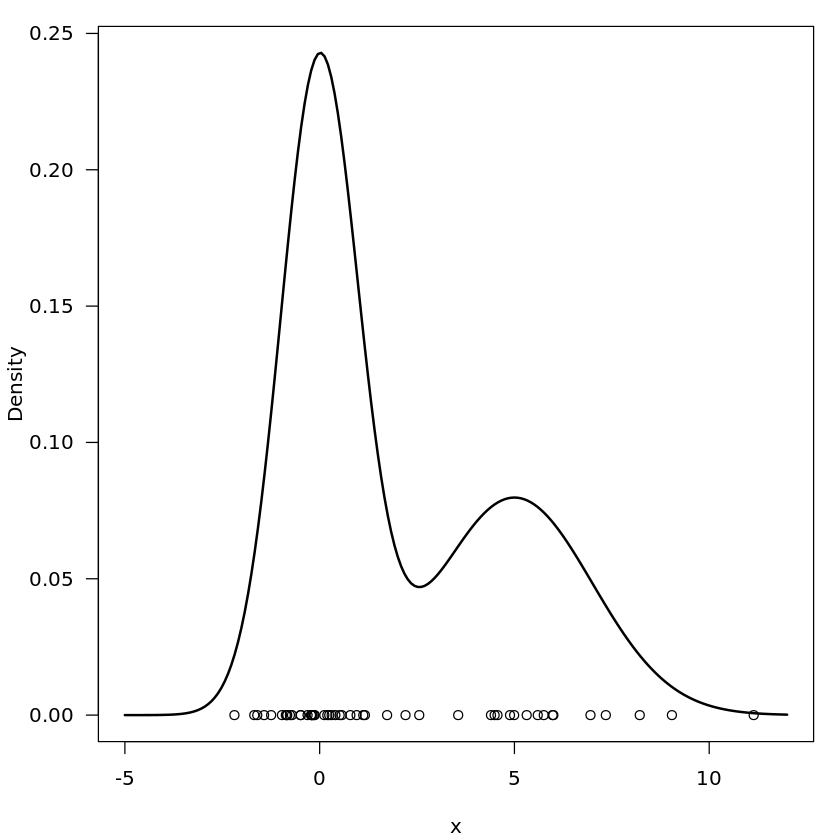

In [12]:
# Generate n observations from a mixture of two Gaussian 
# distributions
n     = 50           # Size of the sample to be generated
w     = c(0.6, 0.4)  # Weights
mu    = c(0, 5)      # Means
sigma = c(1, 2)      # Standard deviations
cc    = sample(1:2, n, replace=T, prob=w)
x     = rnorm(n, mu[cc], sigma[cc])
    
# Plot f(x) along with the observations 
# just sampled
xx = seq(-5, 12, length=200)
yy = w[1]*dnorm(xx, mu[1], sigma[1]) + 
     w[2]*dnorm(xx, mu[2], sigma[2])
par(mar=c(4,4,1,1)+0.1)
plot(xx, yy, type="l", ylab="Density", xlab="x", las=1, lwd=2)
points(x, y=rep(0,n), pch=1)